Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We will perform background estimation on drzblot images of X01. These include:
- X01_201909_G102 and G141
- X01_201910_G102 and G141
- X01_201911_G141
- X01_202001_G102 and G141
- X01_202002_G102 and G141

# Note
X01_201911_G102 was done by 20200824/05 of which results were recorded in 20200824/X01_201911_G102_rebkg/*.

# Previously
20200825/03 generated drzblot images for X01 202002, and 20200824/06 generated for X01 201909, 201910, 201911, and 202001.

# Resources
- 20200824/drzblot_X01_dateobs_filterobs/*flt.fits for drzblot file
- 20200825/drzblot_X01_202002_filterobs/*drzblot.fits for drzblot file
- 20200824/04 as a template for trace mapping and backgroun estimation.


In [26]:
from hstphot.read_ds9region import read_ds9region
from hstgrism.container import Container
from hstgrism.computexyref import ComputeXYREF
from hstgrism.wfc3irg102 import WFC3IRG102
from hstgrism.wfc3irg141 import WFC3IRG141
from hstgrism.cutout2d import Cutout2D
from hstgrism.background import Background
from hstgrism.to_fullframe import to_fullframe
from hstgrism.show_overview import show_overview
from hstgrism.show_bbox import show_bbox
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import copy,glob


In [24]:
sourcename = 'X01'
dateobs_list = ['201909','201910','201911','202001','202002']
filterobs_list = ['G102','G141']
identifier_list = []
for i in dateobs_list:
    for j in filterobs_list:
        t = '{0}_{1}_{2}'.format(sourcename,i,j)
        if t == 'X01_201911_G102':
            continue
        identifier_list.append(t)
containerobj_list = {}
for i in identifier_list:
    t = Container(i,i,'pdf',False)
    containerobj_list[i] = t


In [25]:
beam = 'A'

g = {}
for i in identifier_list:
    if i.split('_')[1] in {'201909','201910','201911','202001'}:
        t = glob.glob('../20200824/drzblot_{0}/*_flt.fits'.format(i))[0]
    else:
        t = glob.glob('./drzblot_{0}/*_drzblot.fits'.format(i))[0]
    g[i] = (t,1)
gfile_list = copy.deepcopy(g)

dfile_list = {'X01_201909_G102':('/Users/kbhirombhakdi/_work/_data/15089/mastDownload/HST/idlk01jjq/idlk01jjq_flt.fits',1),
              'X01_201909_G141':('/Users/kbhirombhakdi/_work/_data/15089/mastDownload/HST/idlk02jtq/idlk02jtq_flt.fits',1),
              'X01_201910_G102':('/Users/kbhirombhakdi/_work/_data/15089/mastDownload/HST/idlk03azq/idlk03azq_flt.fits',1),
              'X01_201910_G141':('/Users/kbhirombhakdi/_work/_data/15089/mastDownload/HST/idlk04b9q/idlk04b9q_flt.fits',1),
              'X01_201911_G141':('/Users/kbhirombhakdi/_work/_data/15510/mastDownload/HST/idwbk4czq/idwbk4czq_flt.fits',1),
              'X01_202001_G102':('/Users/kbhirombhakdi/_work/_data/15510/mastDownload/HST/idwbk5luq/idwbk5luq_flt.fits',1),
              'X01_202001_G141':('/Users/kbhirombhakdi/_work/_data/15510/mastDownload/HST/idwbk6m6q/idwbk6m6q_flt.fits',1),
              'X01_202002_G102':('/Users/kbhirombhakdi/_work/_data/16042/HST/ie8a01juq/ie8a01juq_flt.fits',1),
              'X01_202002_G141':('/Users/kbhirombhakdi/_work/_data/16042/HST/ie8a02xfq/ie8a02xfq_flt.fits',1),
             }

d = {}
for i in dfile_list:
    s = '/'.join(dfile_list[i][0].split('/')[0:-1])
    ss = dfile_list[i][0].split('/')[-1].split('_')[0]+'.reg'
    d[i] = s + '/' + ss
ds9file_list = copy.deepcopy(d)

confile_list = {'X01_201909_G102':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G102.cal.V4.32/G102.F110W.V4.32.conf',
              'X01_201909_G141':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G141.cal.V4.32/G141.F160W.V4.32.conf',
              'X01_201910_G102':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G102.cal.V4.32/G102.F110W.V4.32.conf',
              'X01_201910_G141':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G141.cal.V4.32/G141.F160W.V4.32.conf',
              'X01_201911_G141':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G141.cal.V4.32/G141.F140W.V4.32.conf',
              'X01_202001_G102':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G102.cal.V4.32/G102.F105W.V4.32.conf',
              'X01_202001_G141':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G141.cal.V4.32/G141.F140W.V4.32.conf',
              'X01_202002_G102':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G102.cal.V4.32/G102.F125W.V4.32.conf',
              'X01_202002_G141':'/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G141.cal.V4.32/G141.F140W.V4.32.conf',
             }


# Trace mapping

Save ./X01_201909_G102/X01_201909_G102_xyref.csv
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Save ./X01_201909_G102/X01_201909_G102_trace.csv
Save ./X01_201909_G102/X01_201909_G102_overview.pdf

Save ./X01_201909_G141/X01_201909_G141_xyref.csv
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Save ./X01_201909_G141/X01_201909_G141_trace.csv
Save ./X01_201909_G141/X01_201909_G141_overview.pdf

Save ./X01_201910_G102/X01_201910_G102_xyref.csv
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Save ./X01_201910_G102/X01_201910_G102_trace.csv
Save ./X01_201910_G102/X01_201910_G102_overview.pdf

Save ./X01_201910_G141/X01_201910_G141_xyref.csv
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Pe

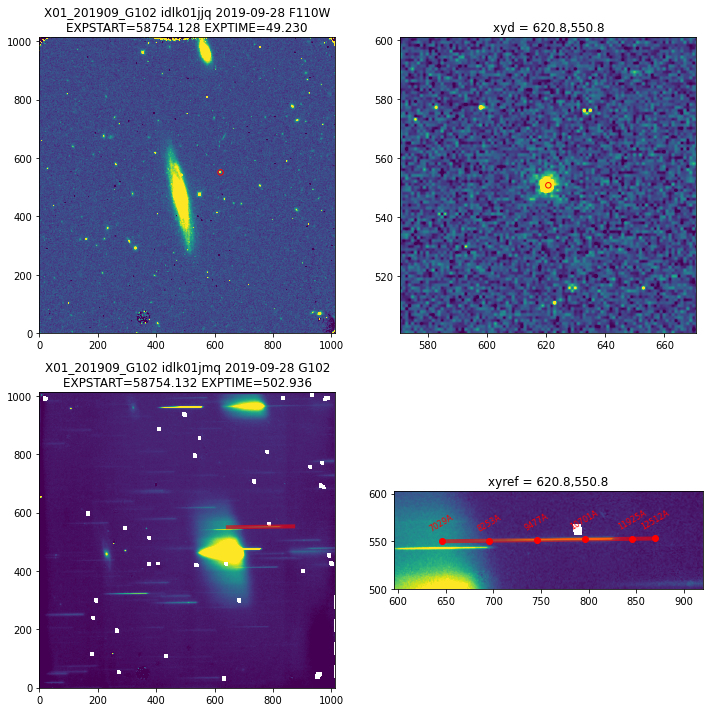

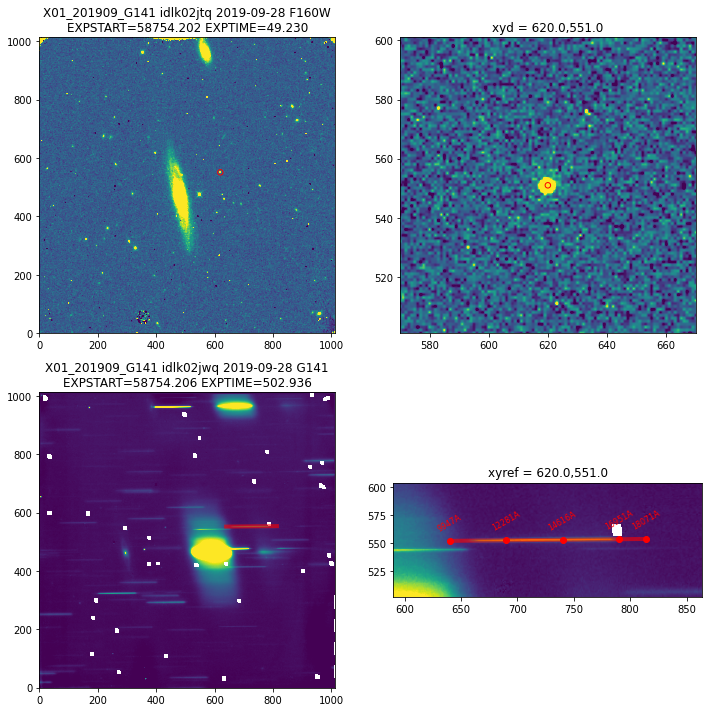

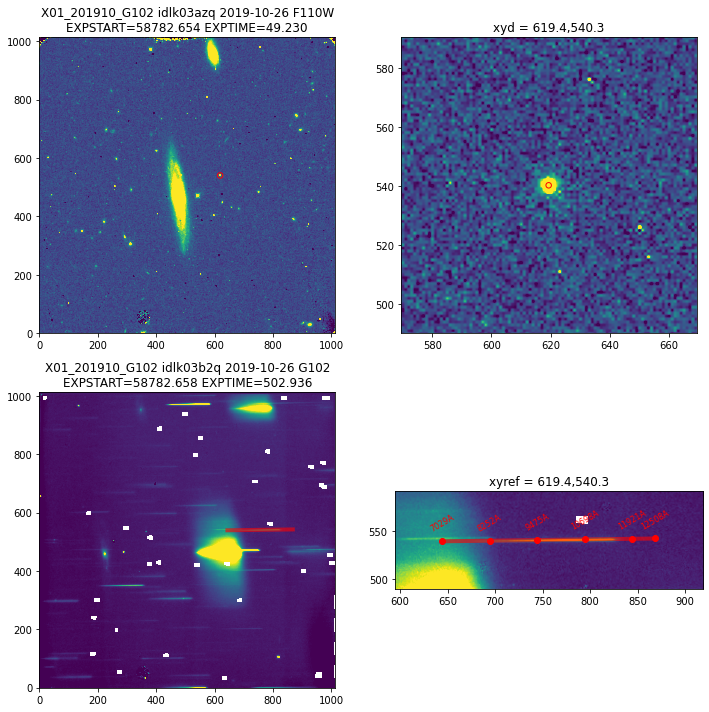

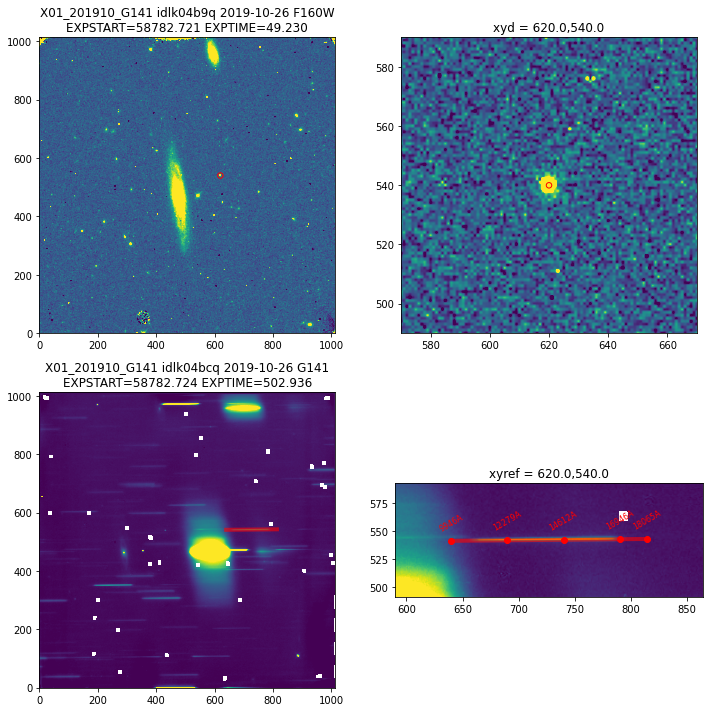

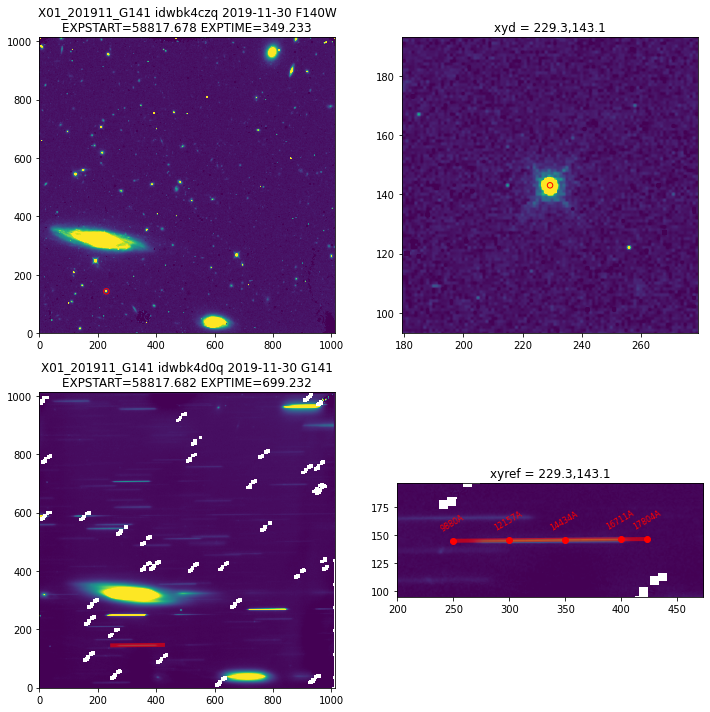

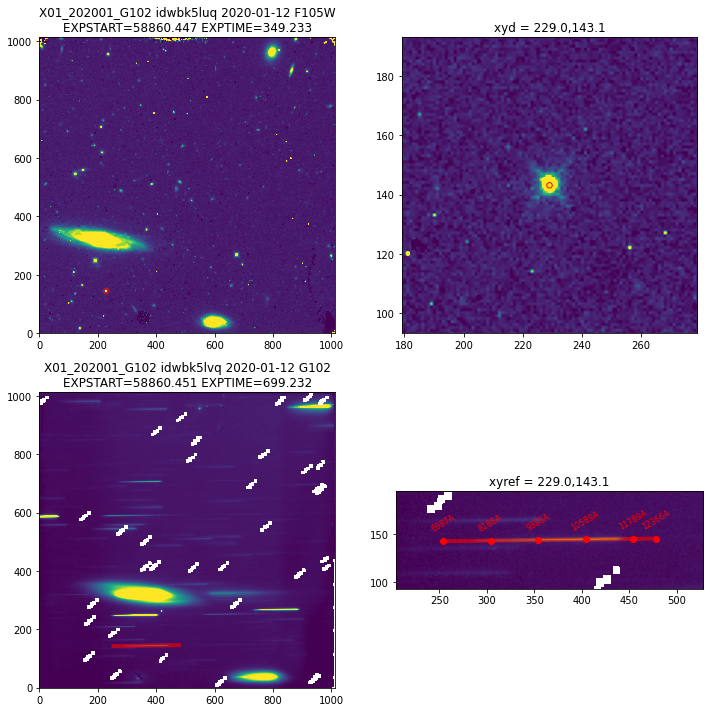

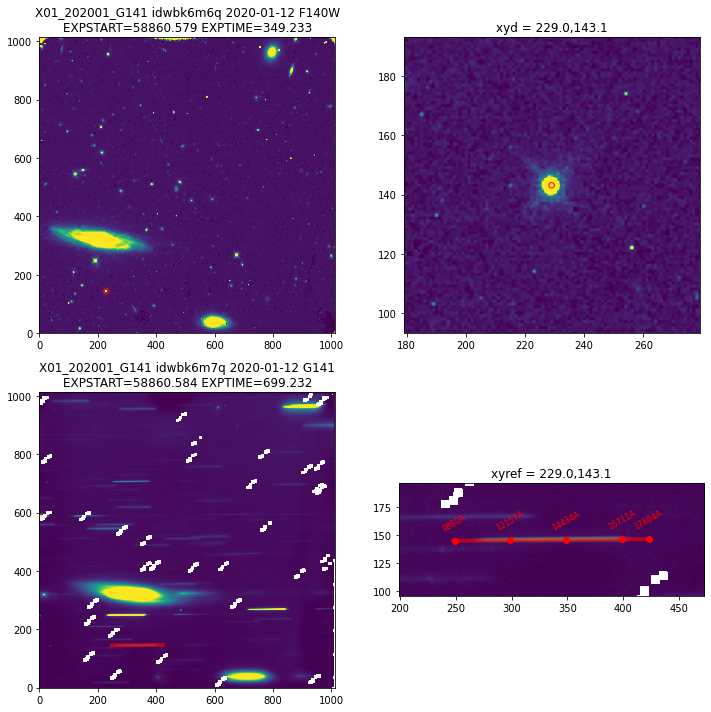

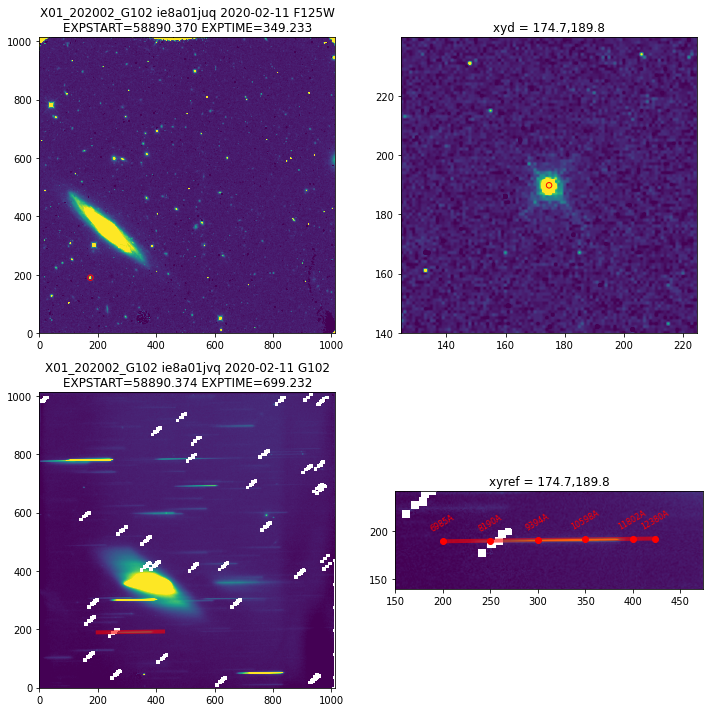

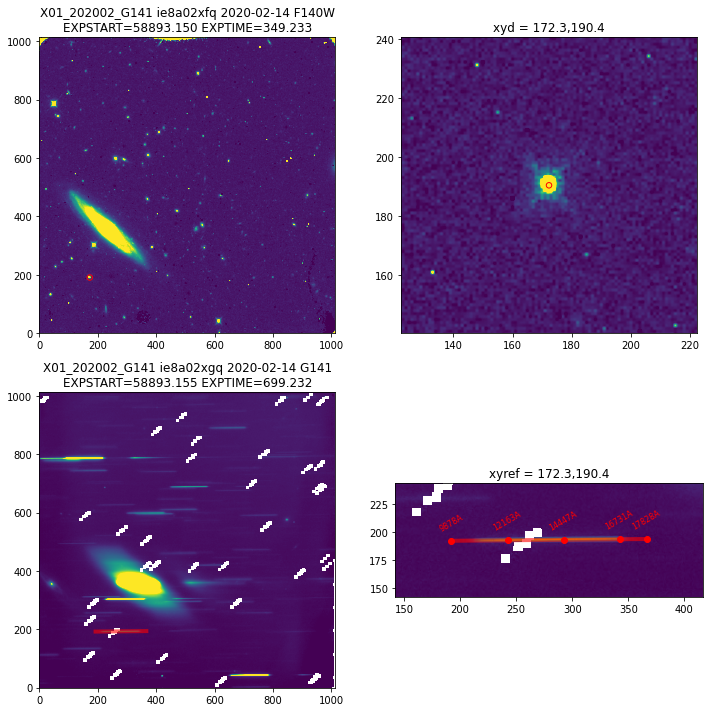

In [34]:
xyd_adjust_list = {'X01_201909_G102':(0.,0.),
              'X01_201909_G141':(0.,1.),
              'X01_201910_G102':(0.,0.),
              'X01_201910_G141':(0.,0.),
              'X01_201911_G141':(0.,1.),
              'X01_202001_G102':(0.,0.),
              'X01_202001_G141':(1.,0.),
              'X01_202002_G102':(0.,1.),
              'X01_202002_G141':(0.,0.),
             }

for i in identifier_list:
    identifier = i
    gfile = gfile_list[i]
    dfile = dfile_list[i]
    confile = confile_list[i]
    ds9file = ds9file_list[i]
    containerobj = containerobj_list[i]
    filterobs = i.split('_')[2]
    xyd_adjust = np.array(xyd_adjust_list[i])
    
    xyd = read_ds9region(ds9file)[sourcename] - np.array([1.,1.]) + xyd_adjust
    xydiff = 'default'
    xyoff = 'default'
    container = containerobj
    t = ComputeXYREF(xyd,xydiff,xyoff,confile,beam,gfile,dfile,container)
    t.compute()
    t.save()

    xyref = pd.read_csv('./{0}/{0}_xyref.csv'.format(identifier)).xyref.values
    container = containerobj
    if filterobs == 'G102':
        gobj = WFC3IRG102(confile,beam,xyref,container=container)
    elif filterobs == 'G141':
        gobj = WFC3IRG141(confile,beam,xyref,container=container)
    gobj.compute()
    gobj.save()

    trace = pd.read_csv('./{0}/{0}_trace.csv'.format(identifier))
    xh = trace.xh.values
    yh = trace.yh.values
    ww = trace.ww.values
    objname = identifier
    save = True
    containter = containerobj
    show_overview(gfile,dfile,xyd,xyref,xh,yh,ww,objname,save,container)


Save ./X01_201909_G102/X01_201909_G102_tbox.csv
Save ./X01_201909_G102/X01_201909_G102_bbox.csv
Save ./X01_201909_G102/X01_201909_G102_bbcorner.csv
Save ./X01_201909_G102/X01_201909_G102_cutout.fits
Save ./X01_201909_G102/X01_201909_G102_mask.fits
Save ./X01_201909_G102/X01_201909_G102_bbox.pdf
Save ./X01_201909_G141/X01_201909_G141_tbox.csv
Save ./X01_201909_G141/X01_201909_G141_bbox.csv
Save ./X01_201909_G141/X01_201909_G141_bbcorner.csv
Save ./X01_201909_G141/X01_201909_G141_cutout.fits
Save ./X01_201909_G141/X01_201909_G141_mask.fits
Save ./X01_201909_G141/X01_201909_G141_bbox.pdf
Save ./X01_201910_G102/X01_201910_G102_tbox.csv
Save ./X01_201910_G102/X01_201910_G102_bbox.csv
Save ./X01_201910_G102/X01_201910_G102_bbcorner.csv
Save ./X01_201910_G102/X01_201910_G102_cutout.fits
Save ./X01_201910_G102/X01_201910_G102_mask.fits
Save ./X01_201910_G102/X01_201910_G102_bbox.pdf
Save ./X01_201910_G141/X01_201910_G141_tbox.csv
Save ./X01_201910_G141/X01_201910_G141_bbox.csv
Save ./X01_20191

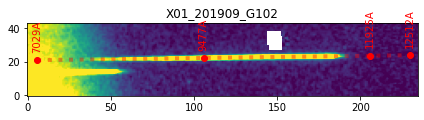

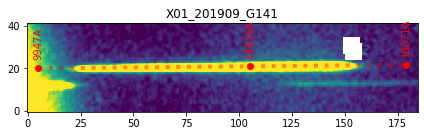

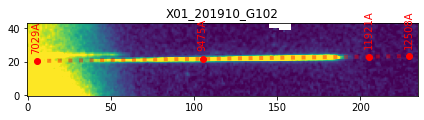

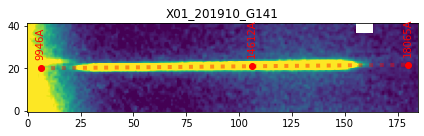

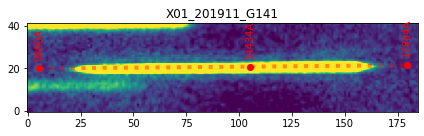

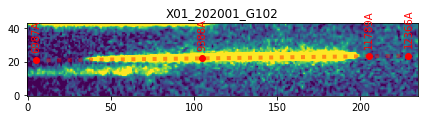

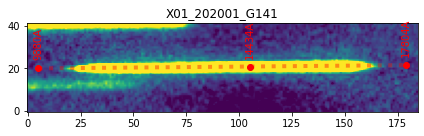

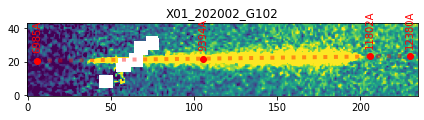

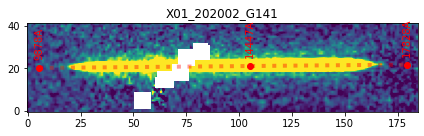

In [36]:
for i in identifier_list:
    identifier = i
    gfile = gfile_list[i]
    dfile = dfile_list[i]
    confile = confile_list[i]
    ds9file = ds9file_list[i]
    containerobj = containerobj_list[i]
    filterobs = i.split('_')[2]
    
    xyref = pd.read_csv('./{0}/{0}_xyref.csv'.format(identifier)).xyref.values
    trace = pd.read_csv('./{0}/{0}_trace.csv'.format(identifier))
    xh = trace.xh.values
    yh = trace.yh.values
    ww = trace.ww.values

    xg = xh + xyref[0]
    yg = yh + xyref[1]
    halfdy = 15
    tbox={'xg': xg, 'yg': yg, 'halfdyup': halfdy, 'halfdylow': halfdy}
    bbox={'padxleft': 5, 'padxright': 5, 'padyup': 5, 'padylow': 5}
    image = fits.open(gfile[0])[gfile[1]].data
    container = containerobj
    cutobj = Cutout2D(tbox,bbox,image,container)
    cutobj.compute()
    cutobj.save()

    cutoutdata = fits.open('./{0}/{0}_cutout.fits'.format(identifier))[1].data
    objname = identifier
    # maskdata = fits.open('./{0}/{0}_mask.fits'.format(identifier))[1].data
    maskdata = None
    do_trace = True
    bb0x = pd.read_csv('./{0}/{0}_bbcorner.csv'.format(identifier)).bb0x.values[0]
    bb0y = pd.read_csv('./{0}/{0}_bbcorner.csv'.format(identifier)).bb0y.values[0]
    xcut = xh + xyref[0] - bb0x
    ycut = yh + xyref[1] - bb0y
    save = True
    container = containerobj
    plt.figure()
    show_bbox(cutoutdata=cutoutdata,objname=objname,maskdata=maskdata,
              do_trace=do_trace,xcut=xcut,ycut=ycut,ww=ww,save=save,container=container
             )


# Summary
We performed trace mapping and generated cutout images of X01. Next, we will focus on background estimation for each image.
